<a href="https://colab.research.google.com/github/SaifRafat/AI_LAB/blob/main/Assingment03_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
from torchsummary import summary



Define the polinomial function

In [ ]:
def polynomial_function(x):
  return 5 * x**3 - 8 * x**2 - 7 *x + 1

Defining DNN model


In [ ]:
class DNN(nn.Module):
  def __init__(self):
    super(DNN, self).__init__()
    self.FL1 = nn.Linear(1,32) #Defining hidden layers
    self.FL2 = nn.Linear(32,64)
    self.FL3 = nn.Linear(64,128)
    self.FL4 = nn.Linear(128,1)

  def forward(self,x):
    x = torch.relu(self.FL1(x)) #initializing activation function
    x = torch.relu(self.FL2(x))
    x = torch.relu(self.FL3(x))
    x = torch.relu(self.FL4(x))
    return x


Generating training samples with numpy and creating tensors

In [ ]:
# np.random.seed(40)
# x_train = np.random.uniform(-20,20,100)
# y_train = polynomial_function(x_train)

# x_train_norm = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train)) *2-1
# y_train_norm = (y_train - np.min(y_train))/(np.max(y_train) - np.min(y_train)) *2-1

# # Splitting data into train,validation and test sets

# x_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train_norm, test_size = .05)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .05)

# #Numpy ---> tensors

# x_train = torch.tensor(x_train, dtype = torch.float32)
# y_train = torch.tensor(y_train, dtype = torch.float32)
# x_val = torch.tensor(x_val, dtype = torch.float32)
# y_val = torch.tensor(y_val, dtype = torch.float32)
# x_test = torch.tensor(x_test, dtype = torch.float32)
# y_test = torch.tensor(y_test, dtype = torch.float32)

# plt.scatter(x_train,y_train)


**We can also create tensors instead of using numpy**


900
50
50


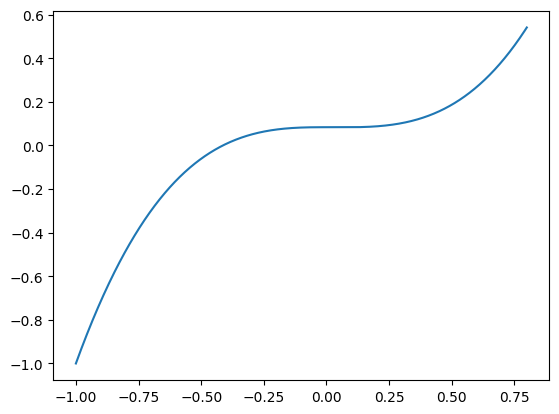

In [ ]:
x_train = torch.arange(-20,20,.04)
y_train = polynomial_function(x_train)

x_train_norm = (x_train - torch.min(x_train)) / (torch.max(x_train) - torch.min(x_train)) * 2 - 1
y_train_norm = (y_train - torch.min(y_train)) / (torch.max(y_train) - torch.min(y_train)) * 2 - 1

# Split the normalized data in train,validation and test
train_size = int(0.9 * len(x_train))
val_size = int(.95 * len(x_train))

x_train = x_train_norm[:train_size]
y_train = y_train_norm[:train_size]

x_val = x_train_norm[train_size:val_size]
y_val = y_train_norm[train_size:val_size]

x_test = x_train_norm[val_size:]
y_test = y_train_norm[val_size:]

print(len(x_train))
print(len(x_val))
print(len(x_test))

plt.plot(x_train,y_train)

Creating dataloader to fit in model

In [ ]:
train_data = TensorDataset(x_train,y_train)
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_data = TensorDataset(x_val, y_val)
val_data_loader = DataLoader(val_data, batch_size=32)
test_data = TensorDataset(x_test,y_test)
test_data_loader = DataLoader(test_data, batch_size=32)

Intialize the model


In [ ]:
model = DNN()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.005)
print(model)
summary(model, (1,))


DNN(
  (FL1): Linear(in_features=1, out_features=32, bias=True)
  (FL2): Linear(in_features=32, out_features=64, bias=True)
  (FL3): Linear(in_features=64, out_features=128, bias=True)
  (FL4): Linear(in_features=128, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
            Linear-2                   [-1, 64]           2,112
            Linear-3                  [-1, 128]           8,320
            Linear-4                    [-1, 1]             129
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


Training the model

In [ ]:
epochs = 1000
train_losses = []
val_losses = []

for epoch in range(epochs):
  model.train()
  running_train_loss = 0.0
  for inputs, targets in train_data_loader:
    optimizer.zero_grad()
    outputs = model(inputs.unsqueeze(1))
    loss = loss_func(outputs, targets.unsqueeze(1))
    loss.backward()
    optimizer.step()
    running_train_loss += loss.item() * inputs.size(0)
  epoch_train_loss = running_train_loss/ len(train_data_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  running_val_loss = 0.0
  for inputs, targets in val_data_loader:
    outputs = model(inputs.unsqueeze(1))
    loss = loss_func(outputs, targets.unsqueeze(1))
    running_val_loss += loss.item() * inputs.size(0)
  epoch_val_loss = running_val_loss/ len(val_data_loader.dataset)
  val_losses.append(epoch_val_loss)
  if epoch%100==0:
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")



Epoch 1/1000, Train Loss: 0.0983, Val Loss: 0.3815
Epoch 101/1000, Train Loss: 0.0748, Val Loss: 0.0830
Epoch 201/1000, Train Loss: 0.0742, Val Loss: 0.0591
Epoch 301/1000, Train Loss: 0.0738, Val Loss: 0.0464
Epoch 401/1000, Train Loss: 0.0736, Val Loss: 0.0390
Epoch 501/1000, Train Loss: 0.0735, Val Loss: 0.0330
Epoch 601/1000, Train Loss: 0.0734, Val Loss: 0.0283
Epoch 701/1000, Train Loss: 0.0733, Val Loss: 0.0247
Epoch 801/1000, Train Loss: 0.0732, Val Loss: 0.0220
Epoch 901/1000, Train Loss: 0.0732, Val Loss: 0.0195


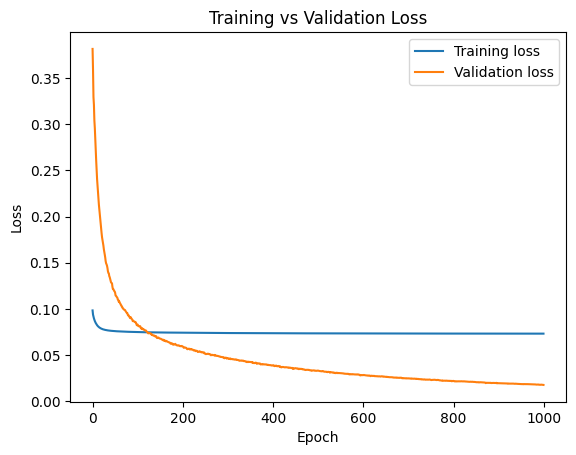

In [ ]:
# Training Vs Validation errors/losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Testing data

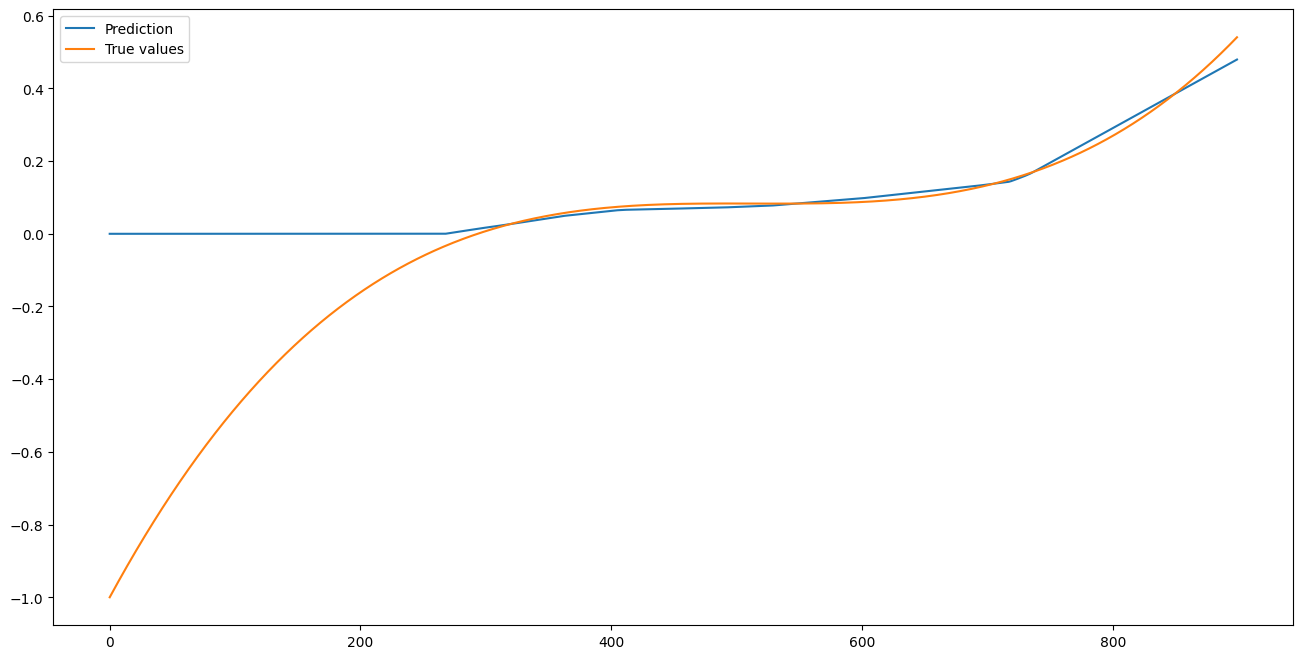

In [ ]:

prediction = []
true_values = []
loss_list = []

model.eval()
with torch.no_grad():
  x_train = x_train.unsqueeze(1)
  pred = model(x_train)
  pred = pred.squeeze(1)
  loss = loss_func(pred, y_train)
  loss_list.append(loss.detach().numpy)

t_pred = pred.view(torch.numel(pred))
true_values = y_train.view(torch.numel(y_train))
plt.figure(figsize=(16, 8))
plt.plot(t_pred, label='Prediction')
plt.plot(true_values, label='True values')
plt.legend()
plt.show()
